# CapStone4 7
## Credit Card Agency
### EDA

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [228]:
data = pd.read_csv('CC GENERAL - CC GENERAL.csv')
print("Display Data head:")
print(data.head())
df = pd.DataFrame(data)

Display Data head:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [230]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


| Column Name                      | Type        | Subtype    | Notes                                             |
| -------------------------------- | ----------- | ---------- | ------------------------------------------------- |
| CUST_ID                          | Categorical | Nominal    | Unique ID for Customer                            |
| BALANCE                          | Numerical   | Continuous | Current Balance                                   |
| BALANCE_FREQUENCY                | Numerical   | Continuous | Balance Update Frequency                          |
| PURCHASES                        | Numerical   | Continuous | Total Purchases                                   |
| ONEOFF_PURCHASES                 | Numerical   | Continuous | One time purchases                                |
| INSTALLMENTS_PURCHASES           | Numerical   | Continuous | Purchases in installments                         |
| CASH_ADVANCE                     | Numerical   | Continuous | Total cash advance amount taken                   |
| PURCHASES_FREQUENCY              | Numerical   | Continuous | Frequency of purchases made (0–1 scale)           |
| ONEOFF_PURCHASES_FREQUENCY       | Numerical   | Continuous | Frequency of one-time purchases (0–1 scale)       |
| PURCHASES_INSTALLMENTS_FREQUENCY | Numerical   | Continuous | Frequency of installment purchases (0–1 scale)    |
| CASH_ADVANCE_FREQUENCY           | Numerical   | Continuous | Frequency of cash advances (0–1 scale)            |
| CASH_ADVANCE_TRX                 | Numerical   | Discrete   | Number of cash advance transactions               |
| PURCHASES_TRX                    | Numerical   | Discrete   | Number of purchase transactions                   |
| CREDIT_LIMIT                     | Numerical   | Continuous | Credit limit assigned to the customer             |
| PAYMENTS                         | Numerical   | Continuous | Total Payments                                    |
| MINIMUM_PAYMENTS                 | Numerical   | Continuous | Minimum payment                                   |
| PRC_FULL_PAYMENT                 | Numerical   | Continuous | Percentage of months full payment made            |
| TENURE                           | Numerical   | Discrete   | Month old - client since                          |

### Checking for Missing Values

In [231]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have missing Values in `CREDIT_LIMIT` & `MINIMUM_PAYMENTS`

### Univariate EDA

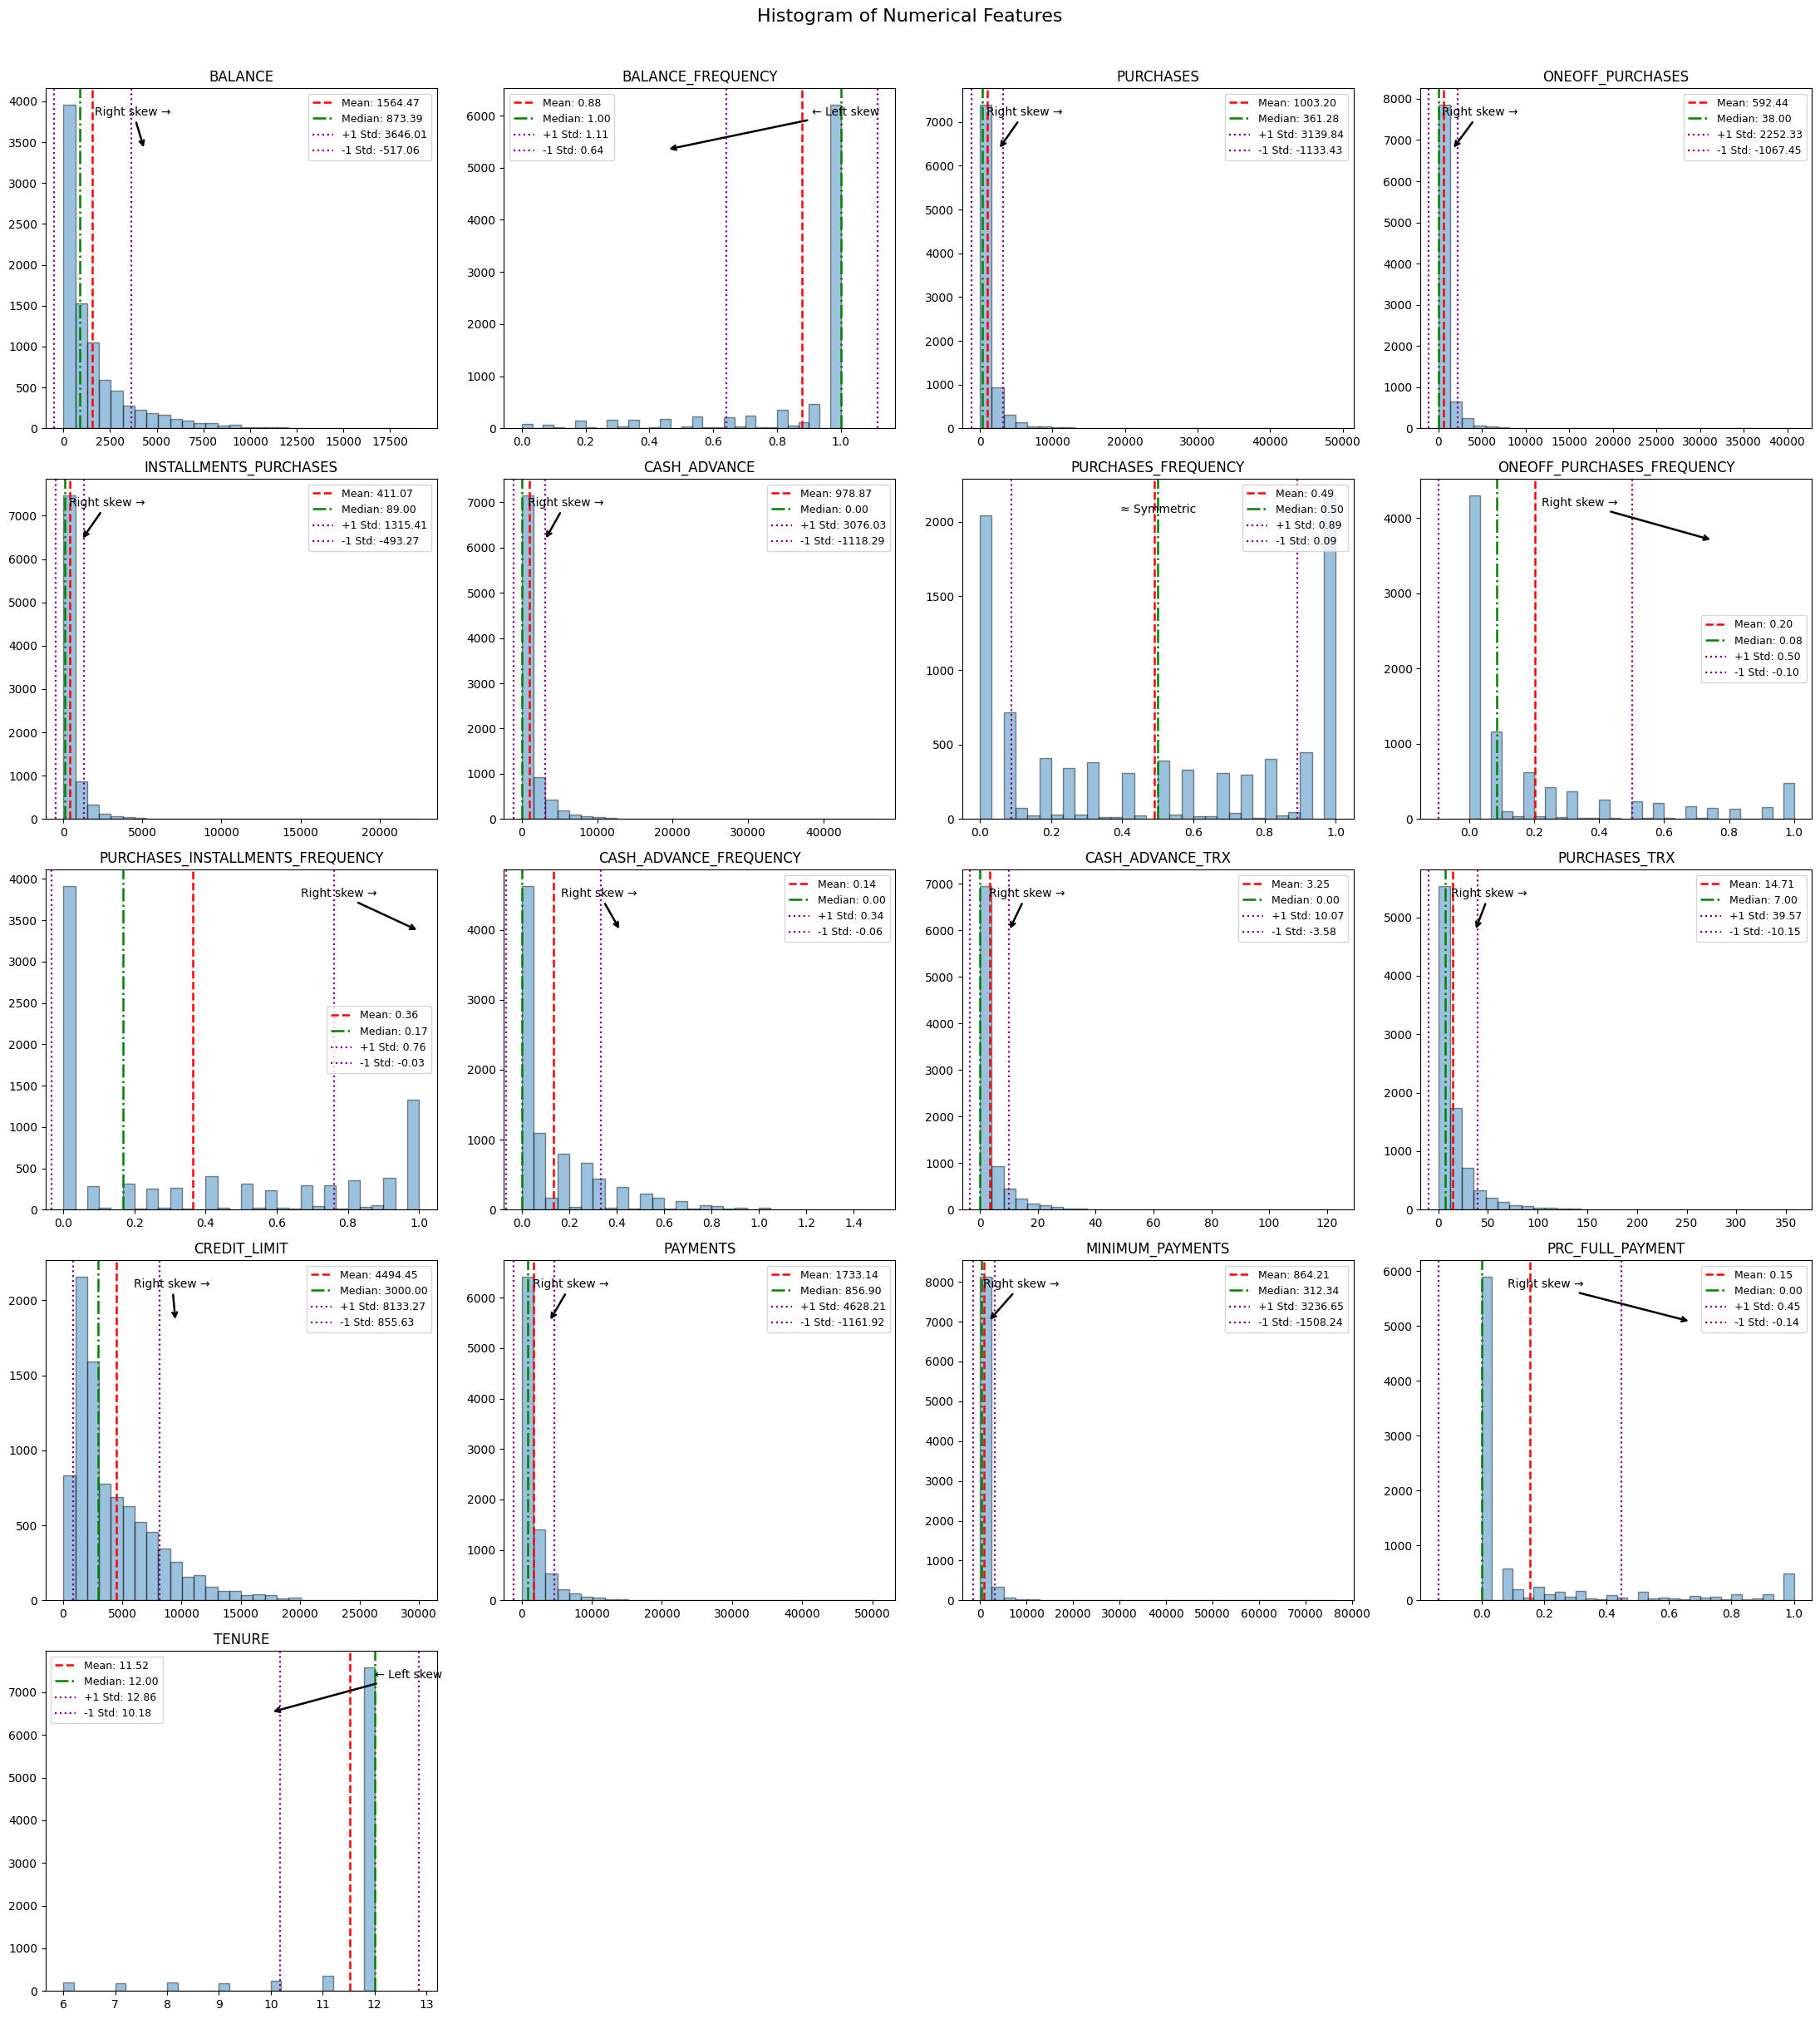

In [232]:
# 1) pick numeric columns (exclude ID)
numeric_cols = df.select_dtypes(include=np.number).columns
# If you have an ID-like numeric column, you can drop it manually:
# numeric_cols = [c for c in numeric_cols if c not in ["CUST_ID"]]

# 2) helper to determine skew direction + where to place arrow
def skew_label_and_pos(skew_val):
    # threshold to avoid labeling tiny skew as "left/right"
    if skew_val > 0.3:
        return "Right skew →", "right"
    elif skew_val < -0.3:
        return "← Left skew", "left"
    else:
        return "≈ Symmetric", "center"

# 3) plotting grid
n = len(numeric_cols)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 4.8 * nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    data = df[col].dropna()

    # histogram
    ax.hist(data, bins=30, edgecolor="black", alpha=0.45)

    # stats
    mean = data.mean()
    median = data.median()
    std = data.std(ddof=1)
    skew = data.skew()

    # vertical lines
    ax.axvline(mean, color="red", linestyle="--", linewidth=1.8, label=f"Mean: {mean:.2f}")
    ax.axvline(median, color="green", linestyle="-.", linewidth=1.8, label=f"Median: {median:.2f}")
    ax.axvline(mean + std, color="purple", linestyle=":", linewidth=1.6, label=f"+1 Std: {(mean+std):.2f}")
    ax.axvline(mean - std, color="purple", linestyle=":", linewidth=1.6, label=f"-1 Std: {(mean-std):.2f}")

    # title
    ax.set_title(col, fontsize=12)

    # skew annotation (arrow)
    label, pos = skew_label_and_pos(skew)

    # place arrow near top of the plot
    ymax = ax.get_ylim()[1]
    if pos == "right":
        x_text = np.nanpercentile(data, 70)
        x_arrow = np.nanpercentile(data, 90)
        ax.annotate(label,
                    xy=(x_arrow, ymax * 0.82),
                    xytext=(x_text, ymax * 0.92),
                    arrowprops=dict(arrowstyle="->", lw=1.8),
                    fontsize=10)
    elif pos == "left":
        x_text = np.nanpercentile(data, 30)
        x_arrow = np.nanpercentile(data, 10)
        ax.annotate(label,
                    xy=(x_arrow, ymax * 0.82),
                    xytext=(x_text, ymax * 0.92),
                    arrowprops=dict(arrowstyle="->", lw=1.8),
                    fontsize=10)
    else:
        x_text = np.nanpercentile(data, 50)
        ax.text(x_text, ymax * 0.90, label, ha="center", fontsize=10)

    # legend inside each plot (like your example)
    ax.legend(fontsize=9, frameon=True, loc="best")

# turn off extra empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Histogram of Numerical Features", fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

Many features are right-skewed <br>
Frequencies are bounded between 0 and 1 <br>
CREDMIT_LIMIT shows large variance <br>

### Checking for Outlier Sensitivity

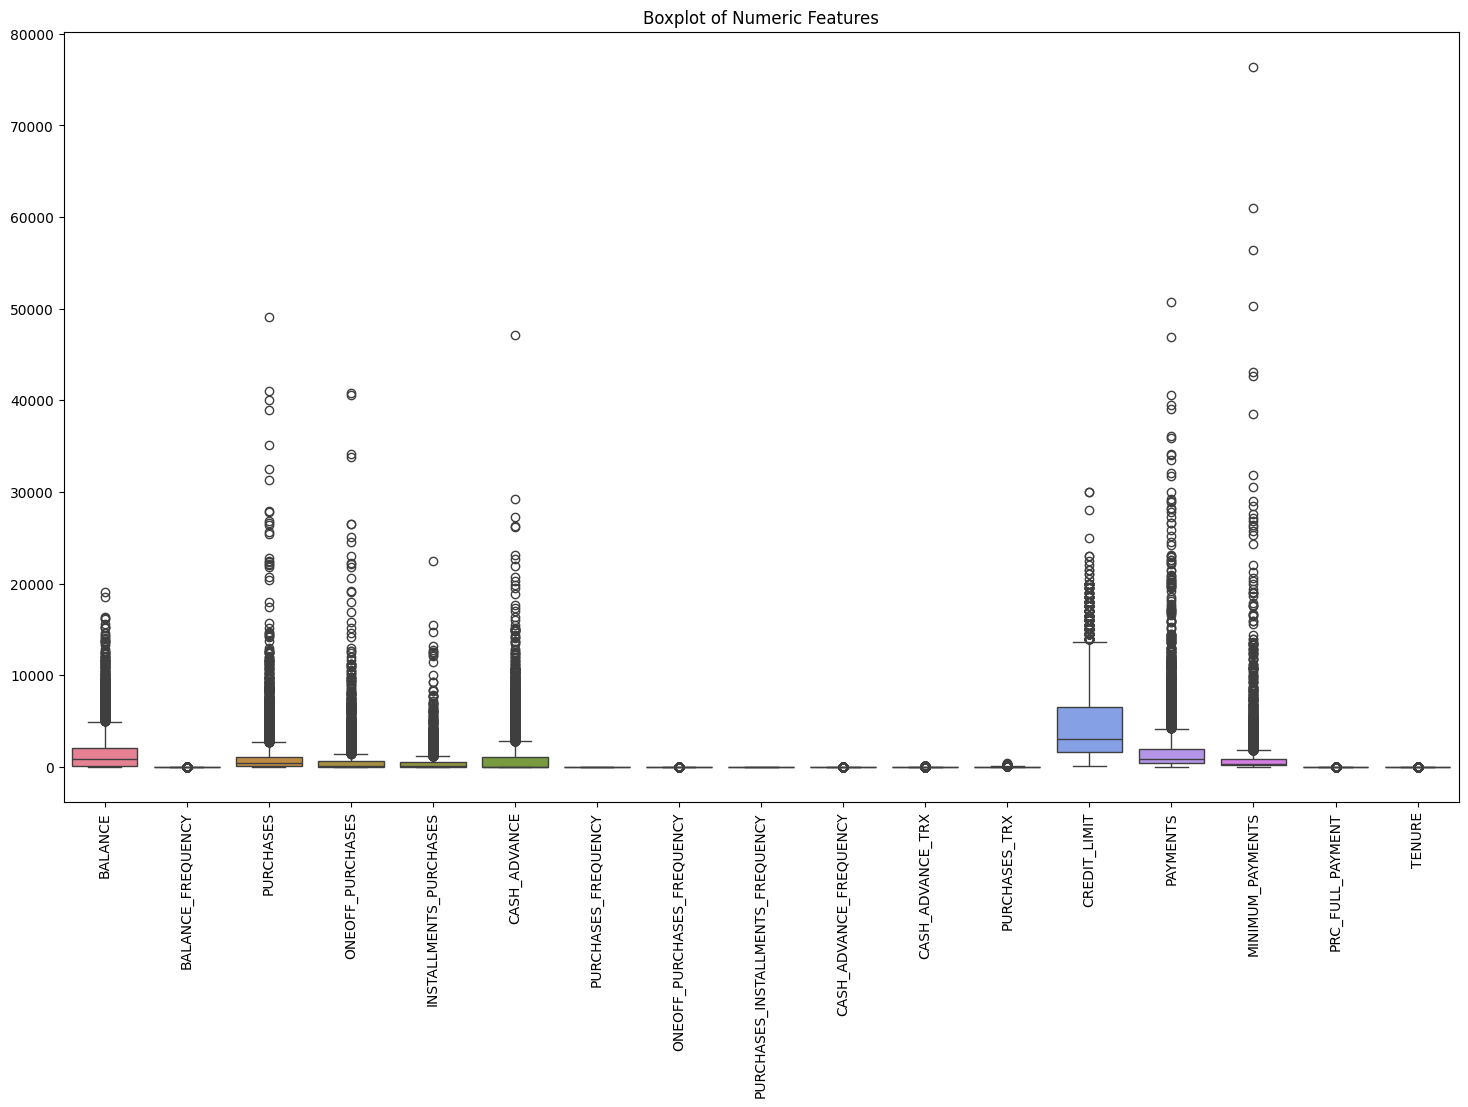

In [233]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

Extreme Outliers exist in BALANCE PURCHASES CASH_ADVANCE <br>
Maybe need to scale before clustering

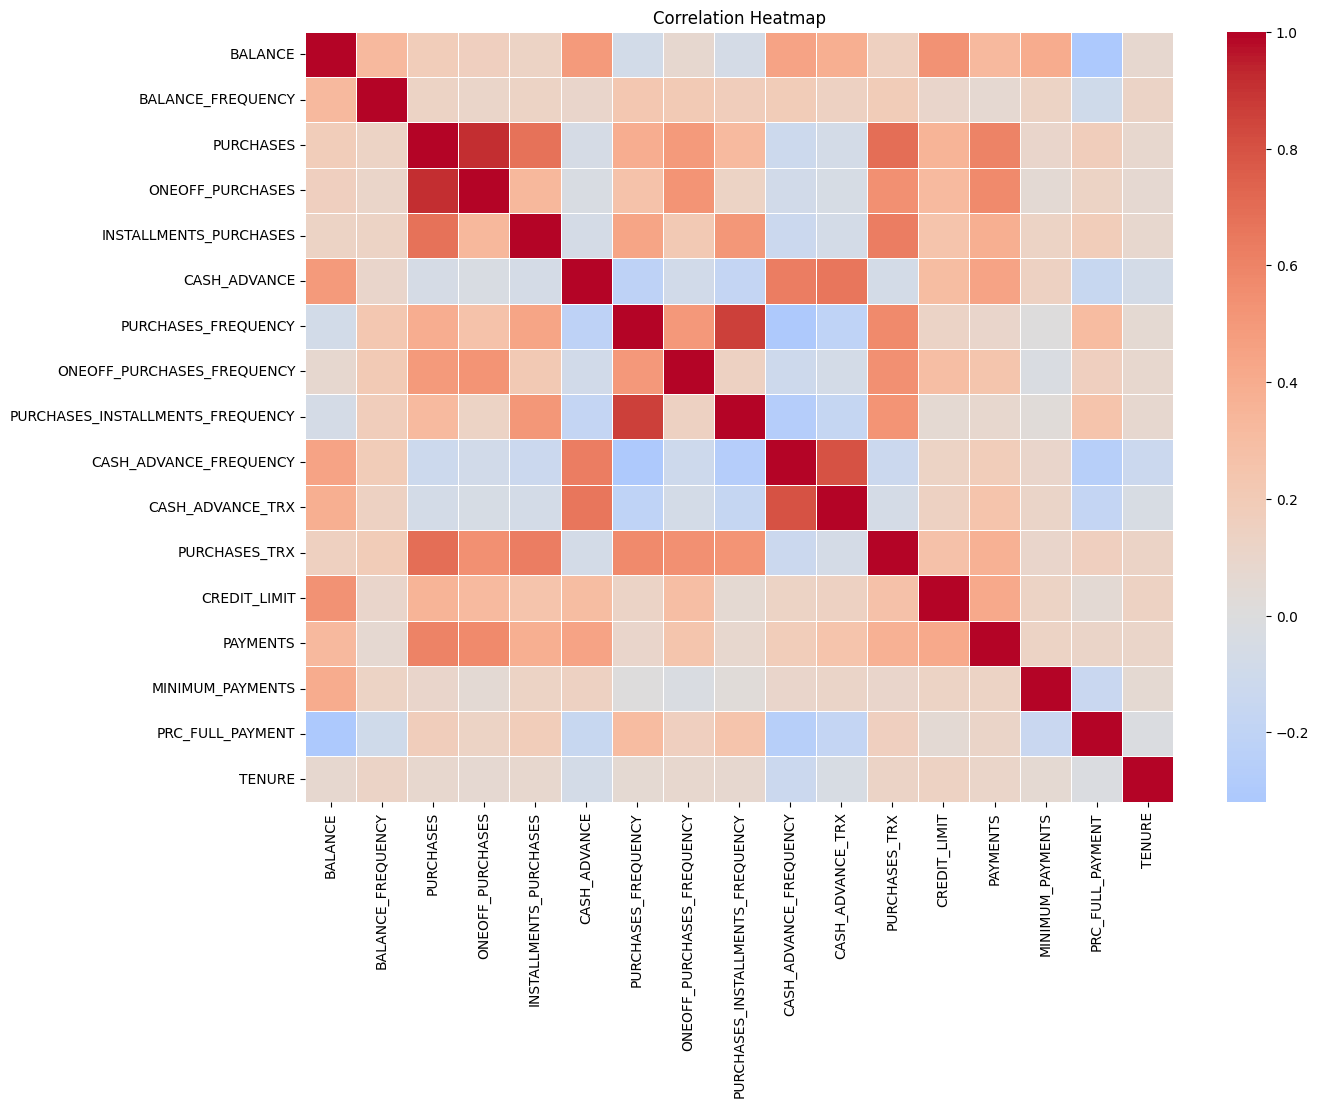

In [234]:
plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

There's a strong correlation between `PURCHASES` & `PURCHASES_TRX`, `CASH_ADVANCE` & `CASH_ADVANCE_TRX`, `ONEOFF_PURCHASES` & `ONEOFF_PURCHASES_FREQUENCY`.</BR>
Customers who spend more tend to transact more frequently, which is intuitive but important confirmation.</br>
Frequency-Based Columns cluster together -> `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENETS_FREQUENCY`

### PairWise Relationship
Visualize between key numerical features and to check for correlations or grouping behavior prior to clustering

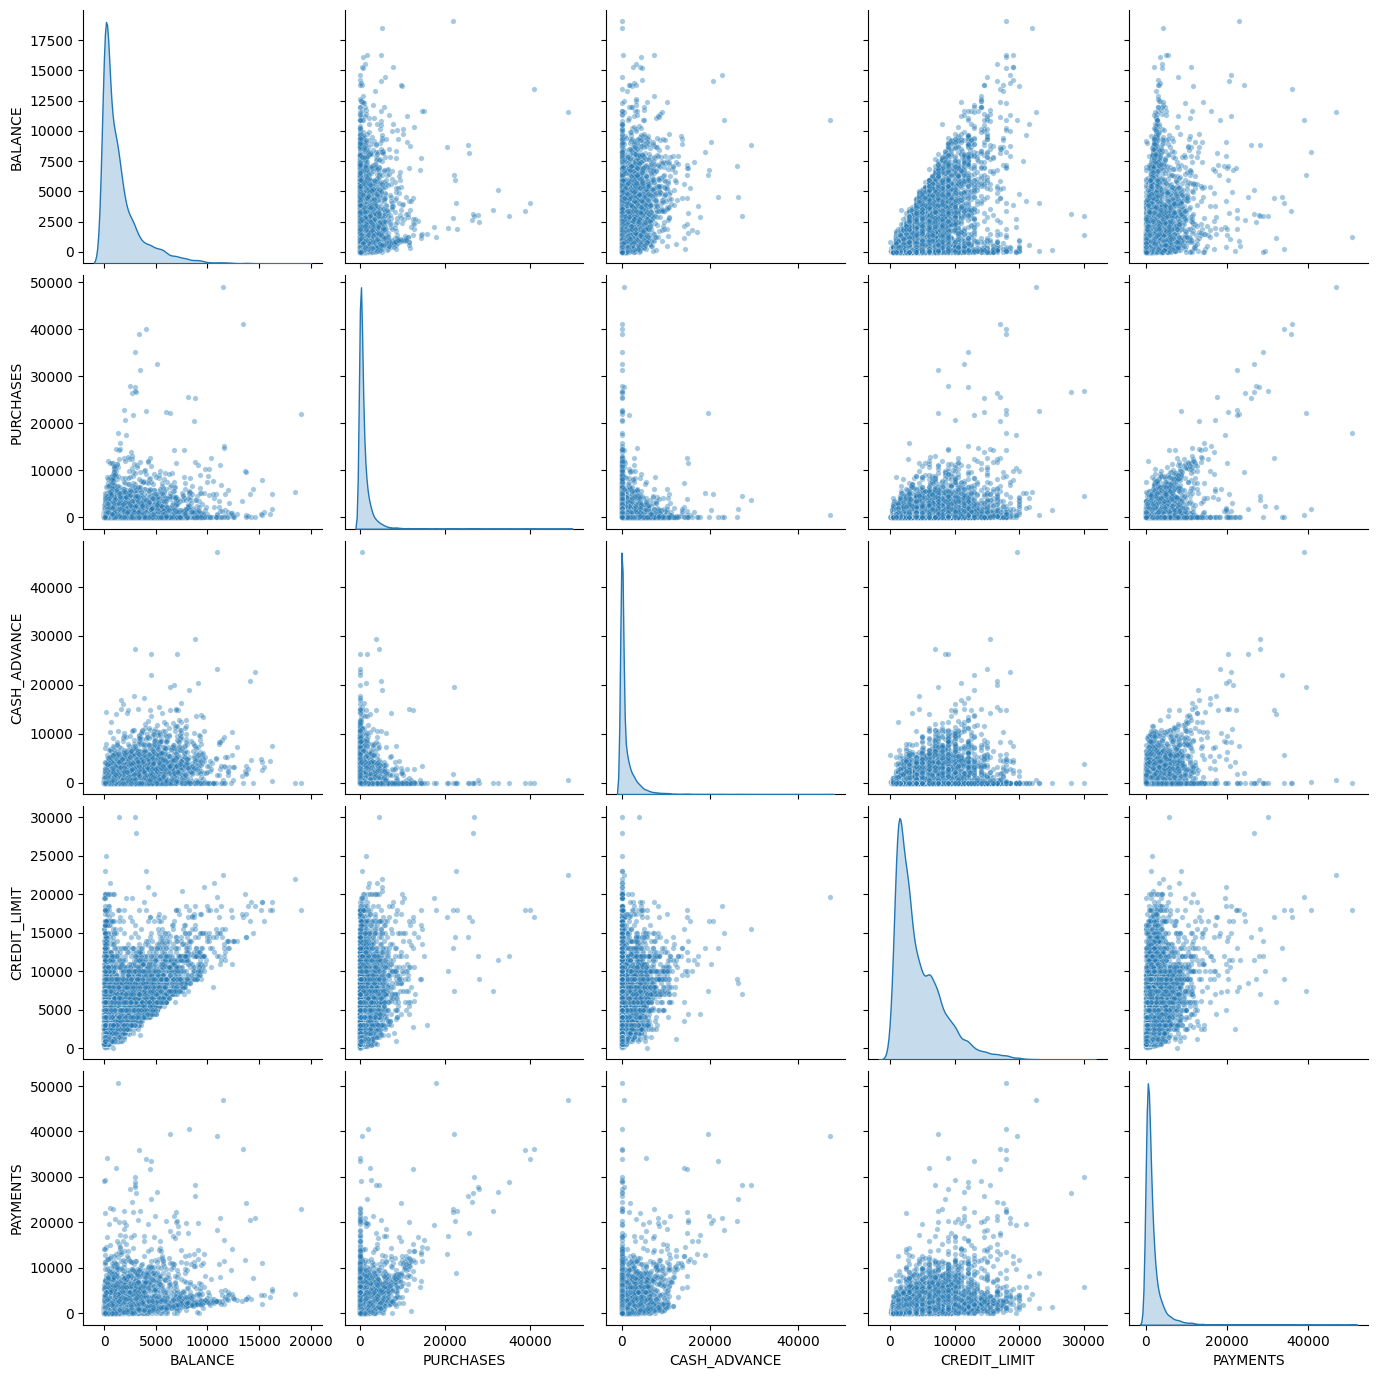

In [235]:
selected_cols = [
    "BALANCE",
    "PURCHASES",
    "CASH_ADVANCE",
    "CREDIT_LIMIT",
    "PAYMENTS"
]

sns.pairplot(
    df[selected_cols],
    diag_kind="kde",
    plot_kws={"alpha": 0.4, "s": 15},
    height=2.8
)
plt.show()


Transparency and kernel density estimates were used in the pairplot to reduce overplotting 
and improve interpretability. Log transformations were applied to skewed variables to better 
reveal underlying structure. </br>

The pairplot reveals high variability and overlap across features, indicating weak pairwise 
relationships and the presence of heterogeneous customer behaviors.

### Statistical Observations

- Many monetary variables exhibit strong right skewness, indicating a small subset of high-usage customers.
- Frequency variables are bounded between 0 and 1 and represent behavioral intensity.
- The presence of extreme values suggests the need for normalization prior to distance-based models.
- Strong correlations between transactional counts and monetary totals indicate redundant information.

### Clustering
Clustering is an unsupervised learning technique used to group similar data points together based on their features, without using predefined labels.

In [236]:
# Drop customer ID
X = df.drop(columns=["CUST_ID"])

# Handle missing values
X = X.fillna(X.mean())

# Scale data
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)


Customer ID column not needed since it does not contain behavioral information </br>
standardizing to prevent scale differences from distorting distance-based clustering

#### KMeans
KMeans is an unsupervised clustering algorithm that groups data points into K clusters by minimizing the distance between points and their assigned cluster centers.</br>
- Simple and widely used</br>
- Works well for globular, distance-based clusters</br>
- Provides clear evaluation via silhouette score</br>

In [237]:
silhouetteScores = {}

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(xScaled)
    score = silhouette_score(xScaled, labels)
    silhouetteScores[k] = score


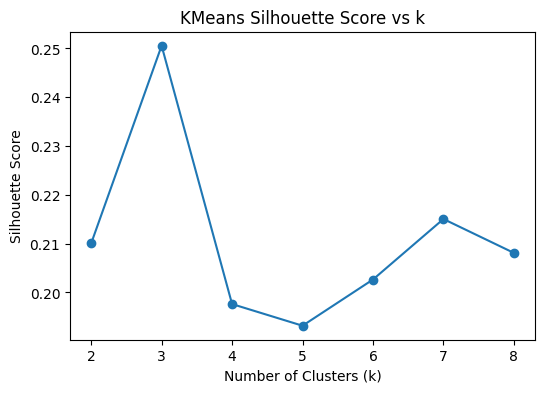

In [238]:
plt.figure(figsize=(6,4))
plt.plot(list(silhouetteScores.keys()), list(silhouetteScores.values()), marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("KMeans Silhouette Score vs k")
plt.show()

In [239]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeansLabels = kmeans.fit_predict(xScaled)

df["KMeans_Cluster"] = kmeansLabels

KMeans was used as a simple, effective baseline for distance-based clustering, and the silhouette score guided the choice of the best number for clusters

`K3` Gives the best clustering quality</br>
- This means it's most cohesive internally

There is a sharp drop from K2 to K4 and K5
- clusters begin to overlap

Overall Silhouette Scores are modest scores ranging around 0.19 and 0.25</br>
And this is natural because it is expected for customer behavior overlapping.

#### Agglomerative Clustering
Does not rely on centroids</br>
Can capture hierarchical relationships</br>
Useful when clusters are not spherical</br>

In [240]:
agg_silhouette_scores = {}

for k in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(xScaled)
    score = silhouette_score(xScaled, labels)
    agg_silhouette_scores[k] = score

agg_silhouette_scores


{2: 0.1775448235536517,
 3: 0.1731098007232828,
 4: 0.1547093352037027,
 5: 0.15806867978666445,
 6: 0.17335577924064002,
 7: 0.156415467090623,
 8: 0.15203451293262077}

Best Agglomerative performance is at K2 </br>
Scores are rellatively flat across K</br>
Overall scores are lower than KMeans</br>

What I have noticed is `Agglomerative` clustering sees the data as "two big groups," while `Kmeans` captures more nuanced customer segments.

In [241]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(xScaled)

df["Agglomerative_Cluster"] = agg_labels

Silhouette scores were again used to evaluate clustering quality.

In [242]:
print("KMeans Silhouette Score:", silhouette_score(xScaled, df["KMeans_Cluster"]))
print("Agglomerative Silhouette Score:", silhouette_score(xScaled, df["Agglomerative_Cluster"]))

KMeans Silhouette Score: 0.1976074492720698
Agglomerative Silhouette Score: 0.1547093352037027


KMeans made slightly better clusters than Agglomerative Clustering, meaning the customers in this dataset group well when we use distance to separate them.

### Visualize Clusters via Dimensionality Reduction
Here we are trying to understand if 'the clusters we found actually look like meaningful groups when viewed in lower dimensions?'

#### Data Setup
X_scaled → for fitting dimensionality reduction </br>
kmeans_labels → only for coloring (NOT fitting)

In [243]:
# Feature matrix
X_vis = xScaled

# Cluster labels for labeling purposes
labels = df["KMeans_Cluster"]

Utilizing functions to reuse </br>
Preparing reusable plotting function to display 2D embedding with clusters colored.

In [244]:
def plot_2d_embedding(X_2d, labels, title):
    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(
        X_2d[:, 0], # First reduced component
        X_2d[:, 1], # Second reduced component
        c=labels, #Cluster labels for coloring
        cmap="tab10", # color map
        alpha=0.7 # transparency
    )
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.colorbar(scatter, label="Cluster")
    plt.show()

#### PCA (Principal Component Analysis)
- Linear method
- Preserves max variance </br></br>
What it tells us:
- Whether clusters are spearable along dominant variance directions
- How much natural structure exists in the data

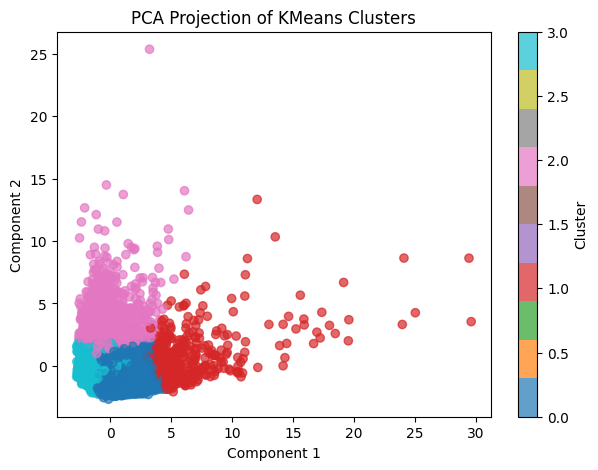

In [245]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vis)

plot_2d_embedding(X_pca, labels, "PCA Projection of KMeans Clusters")

Red cluster is clearly shifted to the right (dominant), and other clusters occupy overlapping regions on the left (this means customer behavior is continuous rather than sharply segmented).</br>
Component 1 is doing most of the work as most of the separation happens horizontally, while component 2 captures secondary behavioral difference3s since separates clusters with similar overall usage but different patterns.</br>
PCA reduced the data to two dimensions while keeping most of the variation, giving a clear view of how the clusters separate </br>
Overlapping does not mean bad clustering.

#### Feature Agglomeration
Clusters features, not samples</br>
Reduces redundancy by merging correlated features

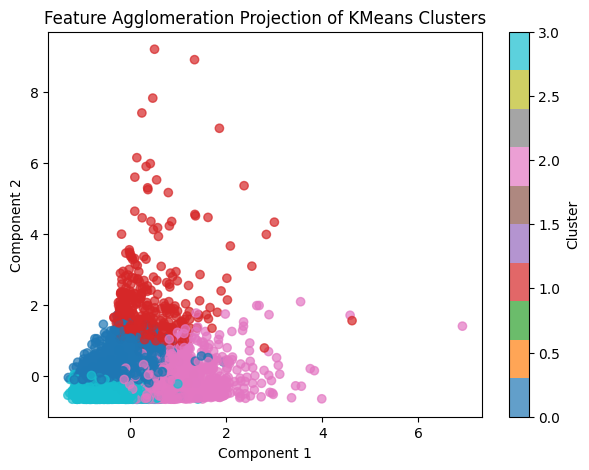

In [246]:
fa = FeatureAgglomeration(n_clusters=2)
X_fa = fa.fit_transform(X_vis)

plot_2d_embedding(X_fa, labels, "Feature Agglomeration Projection of KMeans Clusters")

There is a strong overlap across clusters. When correlated features are merged differnece between customers become less pronounced. This means clustering depends on nuanced behavior across multiple variables, not just broad correlated groups.</br>
Component 1 captures most of the variation after feature merging. Component 2 provides limited additional Separation, present for some clusters (red) but weak for others. This reduces visible cluster boundaries.
</br>Feature Agglomeration reduces dimensionality by merging correlated features, 
which can help simplify structure while retaining important behavioral information.

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)
Why t-SNE?
- Non-linear
- Excellent for visualizing cluster separation
- Preserves local neighborhood structure

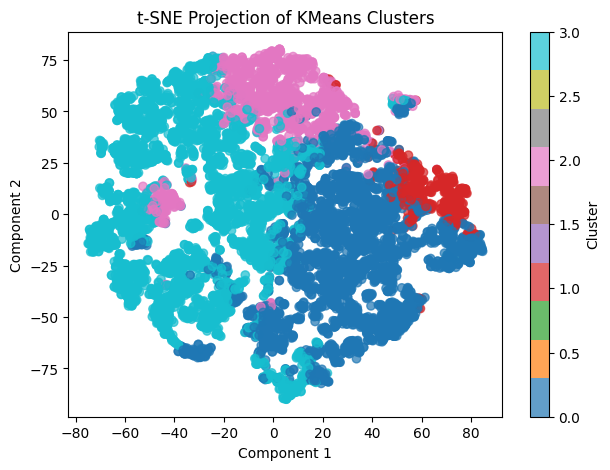

In [247]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_vis)

plot_2d_embedding(X_tsne, labels, "t-SNE Projection of KMeans Clusters")

Clusters are much more clearly separated locally, as clusters appear as disntinct color regions, some clusters form tight, compact groups, others are more diffuse but still separable.</br>
The red cluster is very distinct as it's compact, hs clear separation from others, and occupies a distinct region of the plot.</br>
Some overlap still exists which is normal.</br>
This confirms that KMeans clusters are not arbitrary. There is real structure in the data. Some customer segements are clearly distinct others exist along a spectrum.
</br>t-SNE was applied to capture non-linear relationships and emphasize local cluster structure, 
often revealing clearer separation than linear methods.

#### Truncated SVD
Why TruncatedSVD?
- Similar to PCA but works well with sparse or high-dimensional data
- Common in large-scale ML pipelines

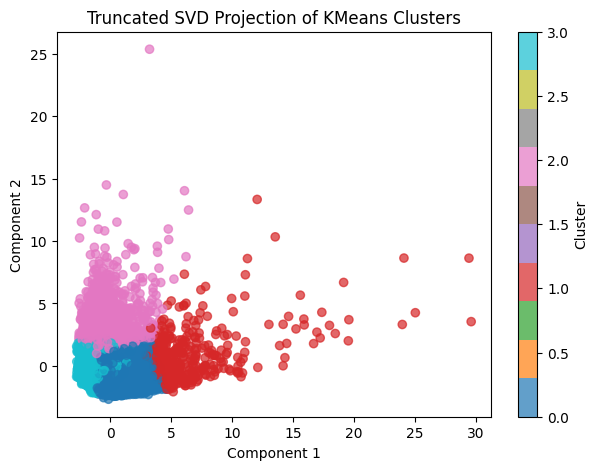

In [248]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_vis)

plot_2d_embedding(X_svd, labels, "Truncated SVD Projection of KMeans Clusters")

Truncated SVD provides an alternative linear projection similar to PCA and is commonly used 
in scalable machine learning workflows. </br>

There is a strong similarity to PCA Projection, visually this plot looks very similar.

Dimensionality reduction techniques were applied to visualize customer clusters in two dimensions. 
Linear methods such as PCA and TruncatedSVD provided interpretable projections, while t-SNE revealed 
clearer non-linear cluster separation. Feature Agglomeration helped reduce feature redundancy before visualization.

### Supervised Learning
Since the dataset does not include a natural target variable, the clusters created during unsupervised learning were used as proxy labels. This turns the problem into a multi-class classification task focused on predicting customer segments.</br>
The target variable represents discrete customer segments, not a continuous value, making classification the correct choice.
#### Define Features & target

In [249]:
# Features (exclude ID and cluster labels)
X = df.drop(columns=["CUST_ID", "KMeans_Cluster", "Agglomerative_Cluster"], errors="ignore")

# Target
y = df["KMeans_Cluster"]

#### Handle Missing Values & Scaling

In [250]:
y.value_counts(normalize=True)

KMeans_Cluster
3    0.444246
0    0.376201
2    0.133855
1    0.045698
Name: proportion, dtype: float64

The distribution of cluster labels is imbalanced, which can bias supervised models toward 
dominant classes. Therefore, models and metrics that account for class imbalance were prioritized.

#### Choose SXupervised Model
Random Forest Classifier</br>
Why?
- Handles non-linear relationships
- Robust to feature scaling issues
- Works well with imbalanced data
- Strong baseline for tabular data

F1-score (macro-averaged) was selected as the evaluation metric because it balances precision 
and recall across all classes equally, making it appropriate for imbalanced multi-class classification.
#### Build Pipeline & Cross Validate

In [251]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring="f1_macro"
)

cv_scores, cv_scores.mean()


(array([0.93166355, 0.94022121, 0.93893902, 0.94108241, 0.93763545]),
 np.float64(0.9379083288710224))

This shows the model is highly consistent all five folds score between 0.93 and 0.94 which is very low variance across folds, model performance is stable, results are not dependent on a specific train-test split.</br>
The model separates clusters very well, The clusters are learnable, as the labels come from unsupervised clustering, if clusters were noisy or meaningless, the classifier would struggle.</br>
Stratified cross-validation was used to preserve class proportions across folds. 
This ensures a reliable estimate of model performance on unseen data.

#### Hyperparameter Tuning
Process of finding the best set of hyperparameter for a model to improve its performance and generalization.</br>
Try different combinations of these Random Forest settings and find the one that performs best.

In [252]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

grid = GridSearchCV( #Trained multiple random forest models, tested them across multiple folds, compared performance using F1-macro and selected thee best performing config.
    pipeline,
    param_grid,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X, y)

grid.best_params_


{'model__max_depth': None,
 'model__min_samples_split': 5,
 'model__n_estimators': 200}

#### Train Final Model

In [253]:
final_model = grid.best_estimator_ #Take best pipeline found in GridSearchCV, retrain it on all variable data and use the optimal hyperparameters.
final_model.fit(X, y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


This Hyperparameter Tuning improved Model Reliability, the model was not chosen arbitrarily, it's structure was validated through cross-validation, Performance is optimized for all classes, not just majority.
</br> “Now that I know the best way to do this, train it on all customers so I can use it in the future.”

#### Model Output
For each of the first five customers, the model predicts which customer cluster they belong to.

In [254]:
sample_preds = final_model.predict(X.iloc[:5])
sample_preds

array([3, 2, 0, 3, 3], dtype=int32)

A Random Forest classifier was trained to predict customer segments derived from clustering. The task was treated as multi-class classification, with class imbalance handled using balanced weights and macro F1-score, along with cross-validation and hyperparameter tuning to improve generalization.

# Final Report

## Actions Completed

- Performed Exploratory Data Analysis (EDA) to understand distributions, skewness, correlations, and overall customer behavior.
- Applied two clustering algorithms (KMeans and Agglomerative Clustering) to segment customers based on credit card usage.
- Evaluated clustering quality using silhouette scores to determine the most appropriate number of clusters.
- Visualized clusters using multiple dimensionality reduction techniques (PCA, Feature Agglomeration, t-SNE, and Truncated SVD).
- Built a supervised learning pipeline to predict customer segments derived from clustering.
- Used cross-validation, evaluation metrics, and hyperparameter tuning to train a final, model.

---------------------------------------------------------------------------------------------------------------------

## Interesting Observations

- Most monetary features were heavily right-skewed, with a small group of customers driving high usage.
- Strong correlations existed between spending-related variables (purchases and transaction counts), while cash advance behavior appeared more distinct.
- Customer behavior showed significant overlap, suggesting continuous usage patterns rather than sharply separated groups.
- Visualization confirmed that clusters exist, but perfect separation is unrealistic for real-world financial data.

---------------------------------------------------------------------------------------------------------------------

## Which Clustering Algorithm Worked Best?

**KMeans clustering performed better than Agglomerative Clustering.**

### Why?
- KMeans achieved higher silhouette scores, particularly at **K3**, indicating better cluster cohesion and separation.
- Agglomerative clustering mainly identified very broad groupings and did not benefit significantly from additional clusters.
- Overall, KMeans captured more useful and interpretable customer segments for this dataset.

---------------------------------------------------------------------------------------------------------------------
## Dimensionality Reduction Techniques Used

- **PCA**  
- **Feature Agglomeration**  
- **t-SNE**  
- **Truncated SVD**

### Preferred Methods & Why

- **t-SNE** was the most visually informative, showing clearer local separation between clusters.
- **PCA and Truncated SVD** provided consistent linear views of the data, confirming that the dominant structure is real but not strongly separated.
- **Feature Agglomeration** showed increased overlap, highlighting that clustering relies on detailed feature interactions rather than only aggregated behavior.

---------------------------------------------------------------------------------------------------------------------

## Supervised Learning Summary

- **Problem Type:** Classification  
- **Target:** Cluster labels generated from KMeans
- **Model Used:** Random Forest Classifier

### Why This Model?
- Handles non-linear relationships well
- Robust to feature interactions
- Supports class imbalance through weighted classes

---------------------------------------------------------------------------------------------------------------------

## Handling Imbalance & Overfitting

- Class imbalance was handled using **balanced class weights**.
- **Macro-averaged F1-score** was used to ensure equal importance across all clusters.
- **Stratified cross-validation** ensured consistent class distribution across folds.
- **Hyperparameter tuning (GridSearchCV)** was applied to control model complexity and improve generalization.

---------------------------------------------------------------------------------------------------------------------

## Model Evaluation

- Models were evaluated using **macro F1-score**, which balances precision and recall across all classes.
- Cross-validation results showed high and stable performance across folds, indicating strong generalization.
- The final pipeline was trained on all available data using the best-performing hyperparameters.

---------------------------------------------------------------------------------------------------------------------

# Final Reflection

EDA is usually straightforward, but this project made it more interesting to see how it connects to later steps. The most valuable learning for me was understanding clustering in practice. How different clustering algorithms work, how they differ from each other, and why one may be more suitable than another depending on the data. I am still learning when to choose the “right” clustering approach, but seeing the differences firsthand helped a lot.

In Task 3, I learned that clusters rarely have perfect boundaries. Some overlap is expected in customer behavior, and linear dimensionality reduction methods confirmed that structure exists but is not dominant. Non-linear methods like t-SNE helped visualize this more clearly.

Overall, I realized this entire workflow is about answering deeper questions:
- *Are there different types of customers here?* → Clustering  
- *Do these groups actually look real?* → Visualization / Dimensionality Reduction  
- *Can a computer learn to recognize which group a new customer belongs to?* → Supervised Learning & Pipelines  

It still feels like a long journey, but I am genuinely enjoying each learning curve and block along the way.
